In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = sns.load_dataset('iris')

In [7]:
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
10,5.4,3.7,1.5,0.2,setosa
121,5.6,2.8,4.9,2.0,virginica


In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='sepal_length', ylabel='petal_width'>

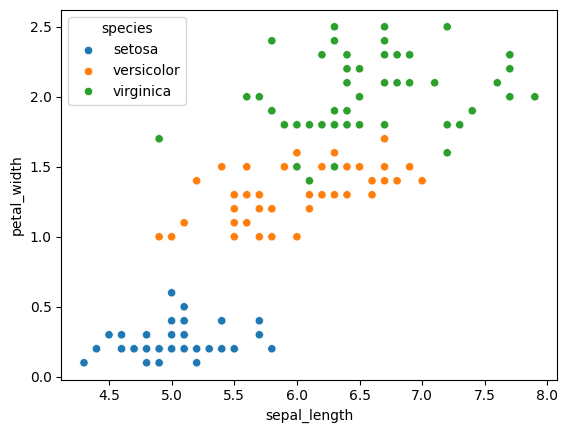

In [14]:
sns.scatterplot(data=df,x='sepal_length', y='petal_width',hue='species')

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [17]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [11]:
X_train.sample(3)

,sepal_length,sepal_width,petal_length,petal_width
72,6.3,2.5,4.9,1.5
149,5.9,3.0,5.1,1.8
129,7.2,3.0,5.8,1.6


In [12]:
ss = StandardScaler()
X_train_new = ss.fit_transform(X_train)
X_test_new = ss.transform(X_test)

In [20]:
ss.mean_

array([5.88660714, 3.05178571, 3.79642857, 1.22321429])

In [13]:
le = LabelEncoder() 
y_train_new = le.fit_transform(y_train)
y_test_new = le.transform(y_test)

In [15]:
X_train_df = pd.DataFrame(X_train_new, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_new, columns=X_test.columns)

In [23]:
np.round(X_train_df.describe(),2)

,sepal_length,sepal_width,petal_length,petal_width
count,112.00,112.00,112.00,112.00
mean,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.83,-2.42,-1.50,-1.44
25%,-0.91,-0.58,-1.24,-1.19
50%,-0.10,-0.12,0.25,0.10
75%,0.71,0.57,0.78,0.87
max,2.32,3.10,1.73,1.64


In [17]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_new, y_train_new)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = knn.predict(X_test_new)

In [20]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [21]:
accuracy_score(y_pred, y_test_new)

0.9736842105263158